In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

## Uczenie nienadzorowane i przetwarzanie wstępne
### Rodzaje nienadzorowanego uczenia maszynowego
### Wyzwania związane z uczeniem nienadzorowanym
### Przetwarzanie wstępne i skalowanie

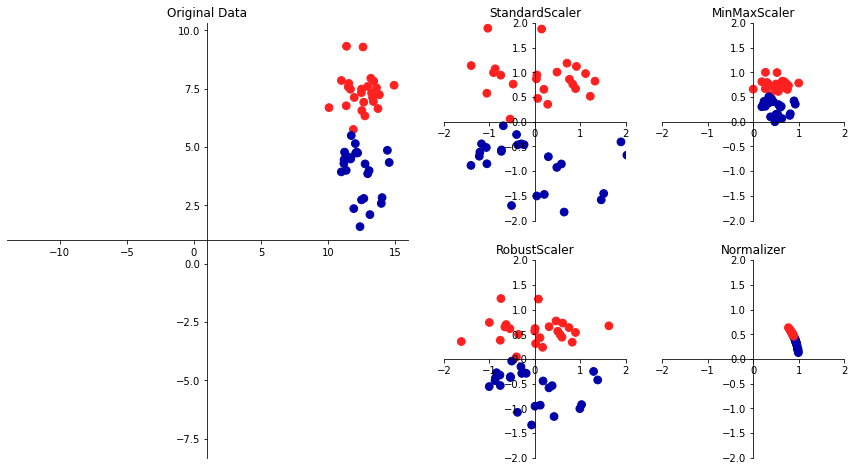

In [2]:
mglearn.plots.plot_scaling()

#### Different Kinds of Preprocessing
#### Zastosowanie transformacji danych

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler()

In [6]:
# dokonaj transformacji danych
X_train_scaled = scaler.transform(X_train)
# wyświetl właściwości zestawu danych przed i po skalowaniu
print("kształt po transformacji: {}".format(X_train_scaled.shape))
print("minimum dla każdej cechy przed skalowaniem:\n {}".format(X_train.min(axis=0)))
print("maksimum dla każdej cechy przed skalowaniem:\n {}".format(X_train.max(axis=0)))
print("minimum dla każdej cechy po skalowaniu:\n {}".format(X_train_scaled.min(axis=0)))
print("maksimum dla każdej cechy po skalowaniu:\n {}".format(X_train_scaled.max(axis=0)))

kształt po transformacji: (426, 30)
minimum dla każdej cechy przed skalowaniem:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
maksimum dla każdej cechy przed skalowaniem:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
minimum dla każdej cechy po skalowaniu:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maksimum dla każdej cechy po skalowaniu:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# dokonaj transformacji danych testowych
X_test_scaled = scaler.transform(X_test)
# wyświetl właściwości zestawu danych po skalowaniu
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("maksimum dla każdej cechy po skalowaniu:\n{}".format(X_test_scaled.max(axis=0)))


per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
maksimum dla każdej cechy po skalowaniu:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


#### Skalowanie danych treningowych i testowych w ten sam sposób

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

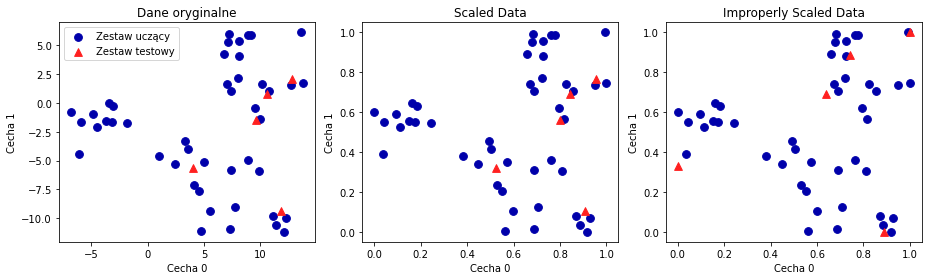

In [8]:
from sklearn.datasets import make_blobs
# stwórz dane syntetyczne
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# podziel na zestawy uczący i testowy
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# umieść zestawy uczący i testowy na wykresie
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Zestaw uczący", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Zestaw testowy", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Dane oryginalne")

# skaluj dane przy użyciu MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# stwórz wizualizacje prawidłowo przeskalowaych danych
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# przeskaluj zestaw testowy osobno
# tak, żeby minimum zestawu testowego wynosiło 0 a maximum 1
# NIE RÓB TEGO! Tylko w celach ilustracyjnych.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# stwórz wizualizację źle przeskalowanych danych
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="zestaw uczący", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="zestaw testowy", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Cecha 0")
    ax.set_ylabel("Cecha 1")
fig.tight_layout()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# wywoływanie metody fit i transform w sekwencji (przy użyciu łączenia metod)
X_scaled = scaler.fit(X).transform(X)
# funkcja wywołana poniżej zwróci ten sam wynik, ale wykona bardziej wydajne obliczenia
X_scaled_d = scaler.fit_transform(X)

#### Wpływ przetwarzania wstępnego na uczenie nadzorowane

In [10]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Dokładność na zestawie testowym: {:.2f}".format(svm.score(X_test, y_test)))

Dokładność na zestawie testowym: 0.94


In [11]:
# przetwarzanie wstępne przy użyciu skalowania 0-1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ucz SVM na przeskalowanych danych uczących
svm.fit(X_train_scaled, y_train)
# oceń model na przeskalowanych testowych
print("Dokładność na przeskalowanym zestawie testowym: {:.2f}".format(
svm.score(X_test_scaled, y_test)))

Dokładność na przeskalowanym zestawie testowym: 0.97


In [12]:
# dokonaj wstępnego przetwarzania przy użyciu zerowej średniej i skalowania wariancji jednostkowej
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ucz maszynę SVM na przeskalowanych danych uczących
svm.fit(X_train_scaled, y_train)
# oceń model na przeskalowanych danych uczących
print("Dokładność SVM na zestawie testowym: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Dokładność SVM na zestawie testowym: 0.96


### Redukcja wymiarowości, wyodrębnianie cech i Wielorakie uczenie
#### Analiza głównych komponentów (PCA)

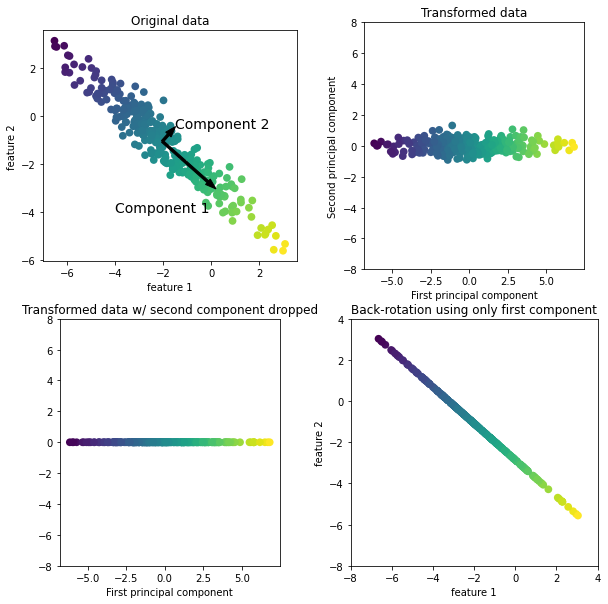

In [13]:
mglearn.plots.plot_pca_illustration()

##### Applying PCA to the cancer dataset for visualization

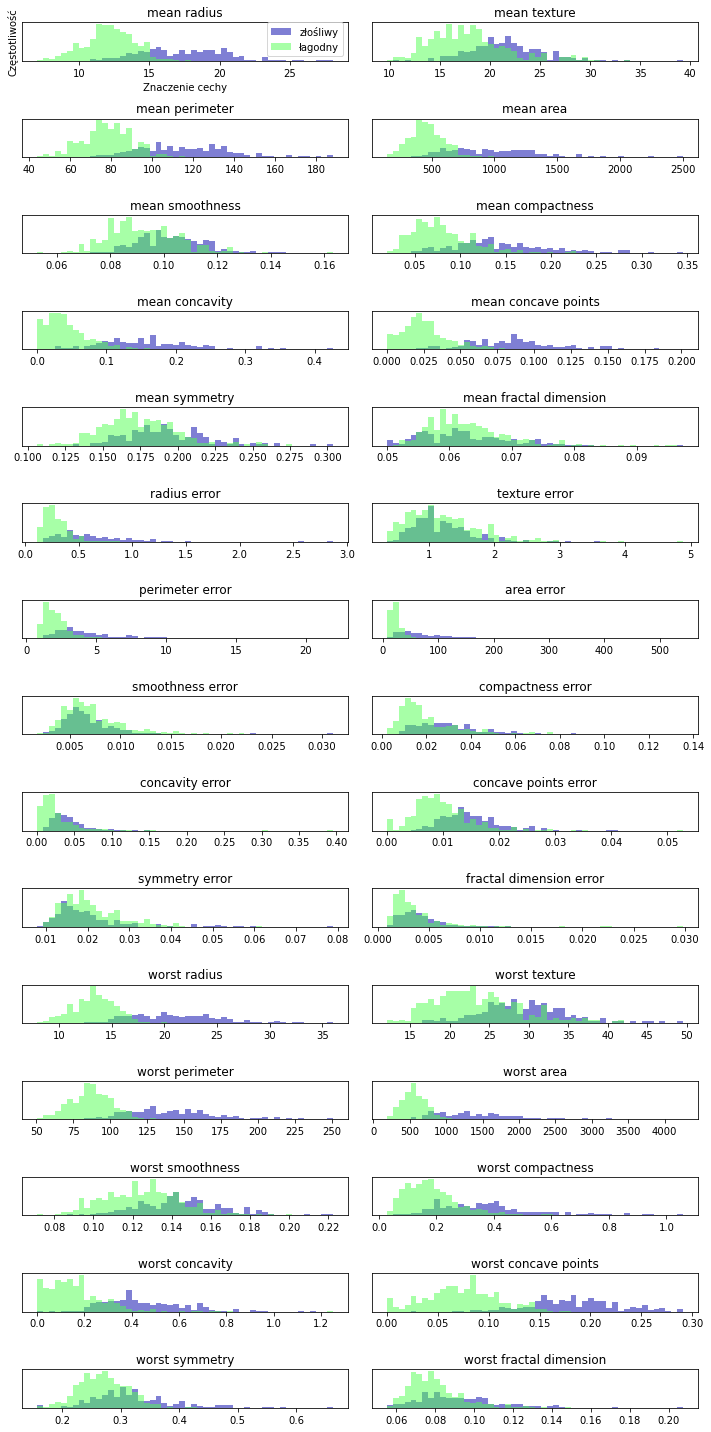

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Znaczenie cechy")
ax[0].set_ylabel("Częstotliwość")
ax[0].legend(["złośliwy", "łagodny"], loc="best")
fig.tight_layout()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
# zachowaj pierwsze dwa główne komponenty danych
pca = PCA(n_components=2)
# dopasuj model PCA do zestawu danych breast cancer
pca.fit(X_scaled)
# wywołaj metodę transorm na dwóch pierwszych komponentach głównych
X_pca = pca.transform(X_scaled)
print("Kształt oryginalny: {}".format(str(X_scaled.shape)))
print("Kształt zredukowany: {}".format(str(X_pca.shape)))

Kształt oryginalny: (569, 30)
Kształt zredukowany: (569, 2)


Text(0, 0.5, 'Drugi główny komponent')

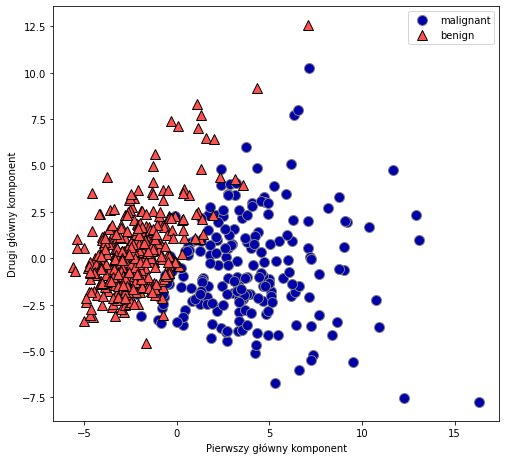

In [17]:
# porównaj na wykresie pierwszy i drugi główny składnik, pokolorowany według klas
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Pierwszy główny komponent")
plt.ylabel("Drugi główny komponent")

In [18]:
print("Kształt komponentu PCA: {}".format(pca.components_.shape))

Kształt komponentu PCA: (2, 30)


In [19]:
print("Komponenty PCA:\n{}".format(pca.components_))

Komponenty PCA:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, 'Komponenty główne')

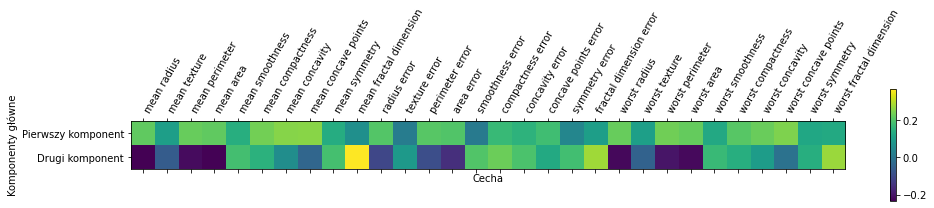

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Pierwszy komponent", "Drugi komponent"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Cecha")
plt.ylabel("Komponenty główne")

##### Powierzchnia własna do wyodrębniania cech

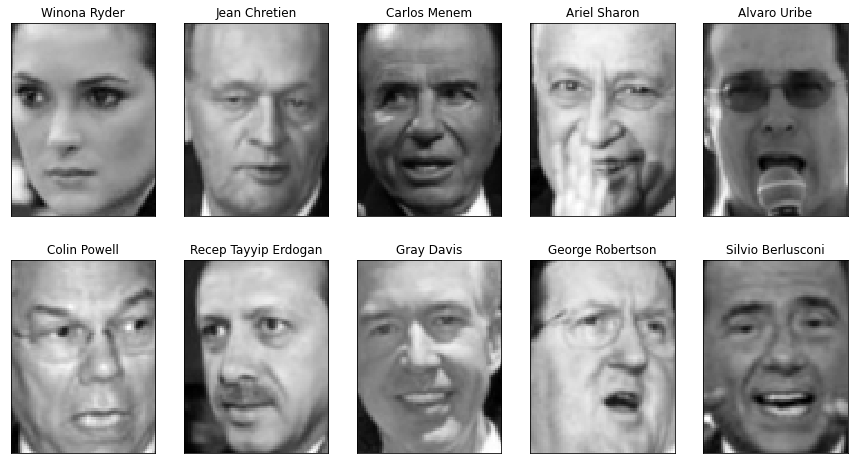

In [21]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [22]:
print("people.images.shape: {}".format(people.images.shape))
print("Liczba klas: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Liczba klas: 62


In [23]:
# zlicz jak często pojawia się każdy cel
counts = np.bincount(people.target)
# wyświetl liczbę wystąpień razem z nazwami celi
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# skaluj wartości odcieni szarości tak, aby znajdowały się w przedziale od 0 do 1
# zamiast w przedziale od 0 do 255 dla lepszej stabilności numerycznej
X_people = X_people / 255.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# podziel dane na zestaw uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# stwórz obiekt KNeighborsClassifier przy użyciu jednego sąsiad
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Wynik na zestawie testowym przy użyciu 1 najbliższego sąsiada: {:.2f}".format(knn.score(X_test, y_test)))

Wynik na zestawie testowym przy użyciu 1 najbliższego sąsiada: 0.23


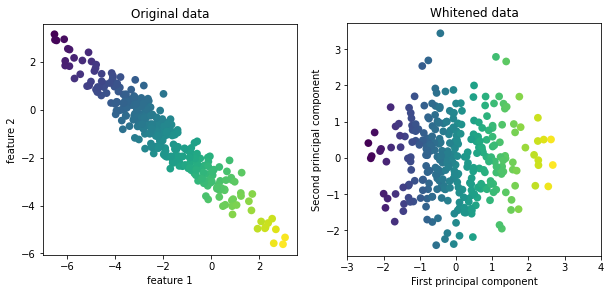

In [26]:
mglearn.plots.plot_pca_whitening()

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Dokładność na zestawie testowym: {:.2f}".format(knn.score(X_test_pca, y_test)))

Dokładność na zestawie testowym: 0.31


In [29]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


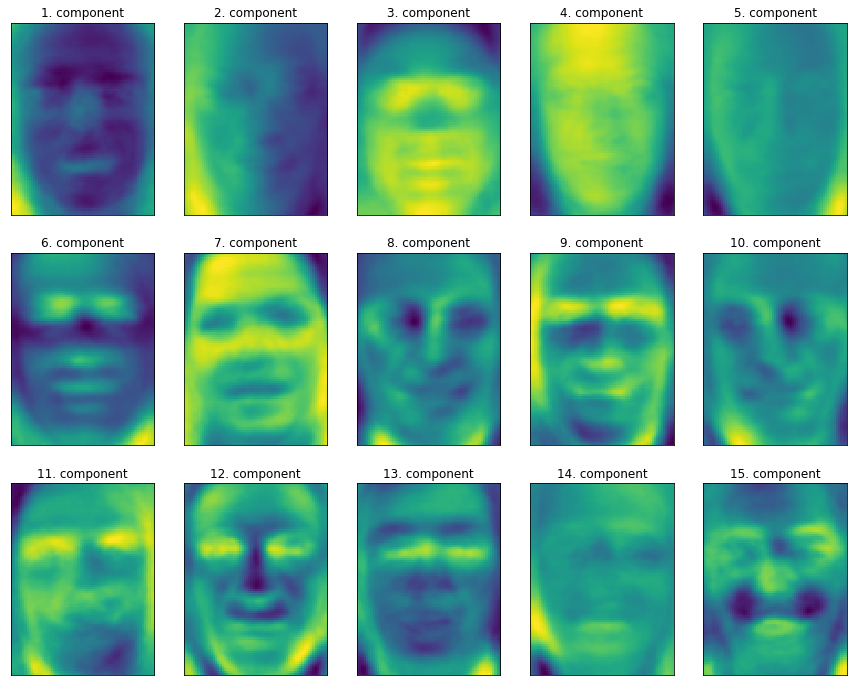

In [30]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [31]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.savefig("images/03-face_decomposition.png")
plt.close()

![decomposition](images/03-face_decomposition.png)

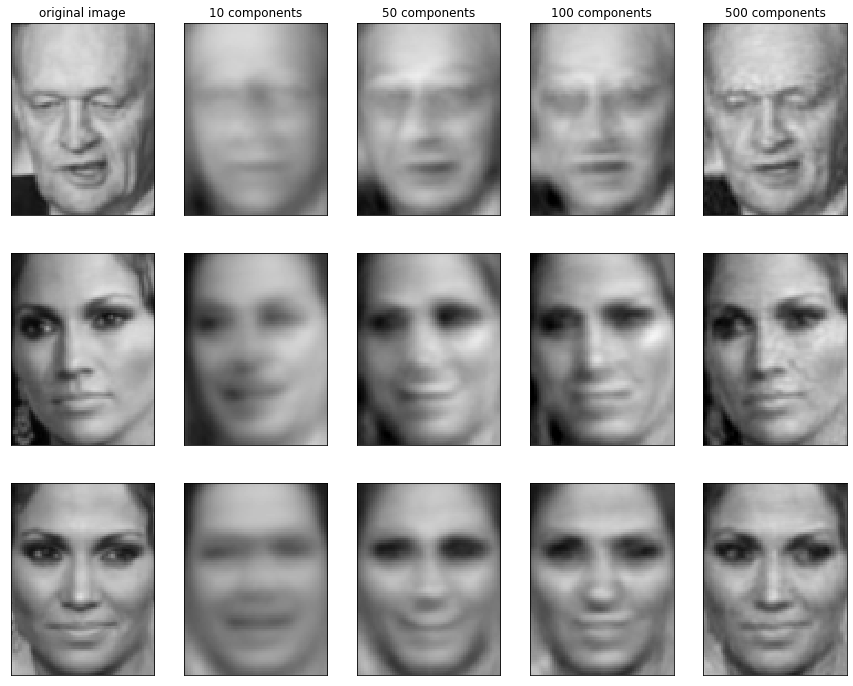

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Drugi główny komponent')

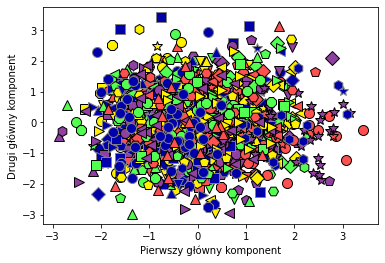

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("Pierwszy główny komponent")
plt.ylabel("Drugi główny komponent")

#### Nieujemna faktoryzacja macierzy (NMF)
##### Zastosowanie NMF do danych syntetycznych

c:\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


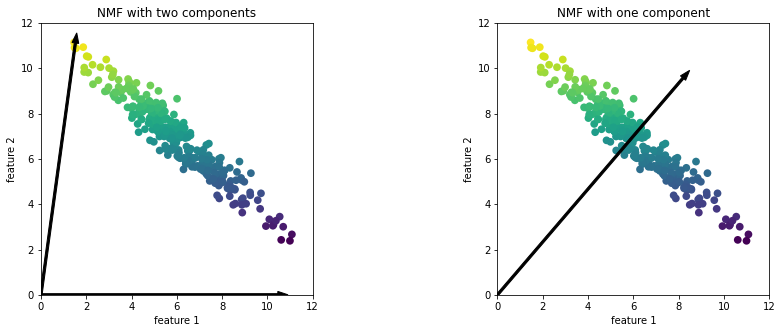

In [34]:
mglearn.plots.plot_nmf_illustration()

##### Stosowanie NMF do obrazów twarzy

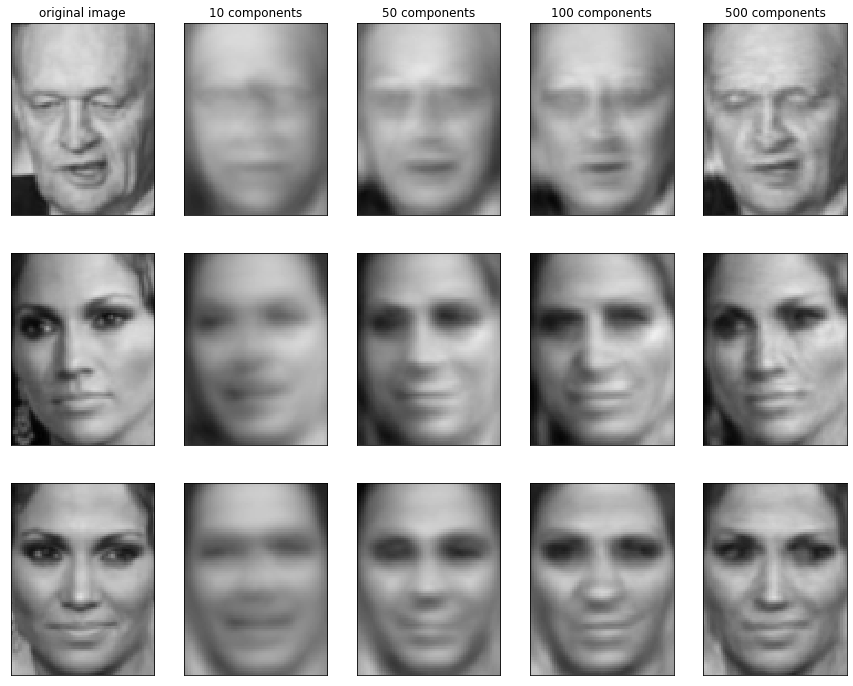

In [35]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

c:\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


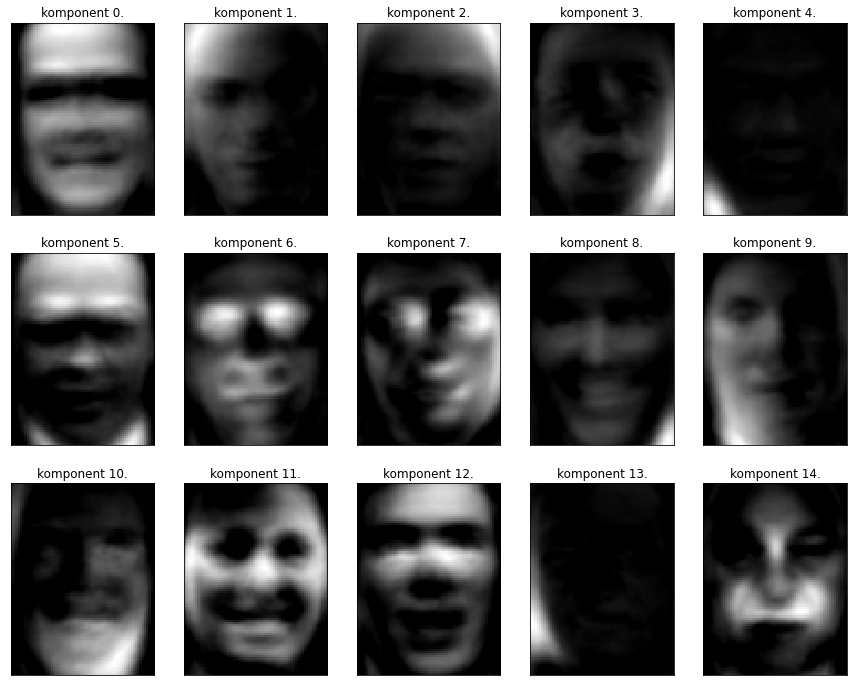

In [36]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("komponent {}.".format(i))

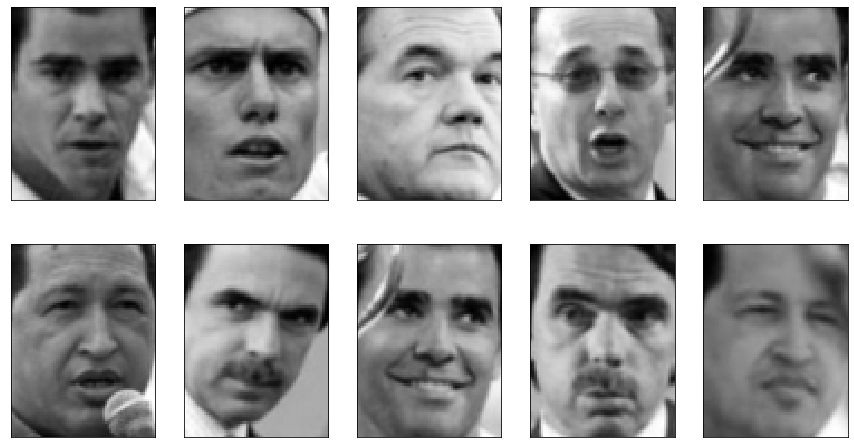

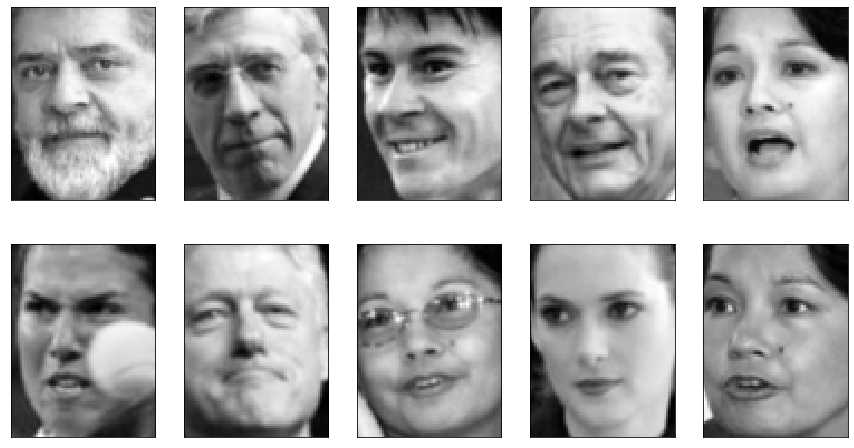

In [37]:
compn = 3
# posortuj po trzecim kompnencie, wyświetl 10 pierwszych obrazów
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# posortuj po siódmym kompnencie, wyświetl 10 pierwszych obrazów
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Sygnał')

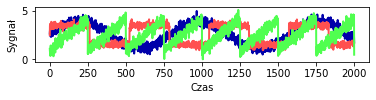

In [38]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Czas")
plt.ylabel("Sygnał")

In [39]:
# mieszaj dane do 100 wymiarowego stanu
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Kształt pomiarów: {}".format(X.shape))

Kształt pomiarów: (2000, 100)


In [40]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Odzyskany kształt sygnału: {}".format(S_.shape))

Odzyskany kształt sygnału: (2000, 3)


c:\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [41]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

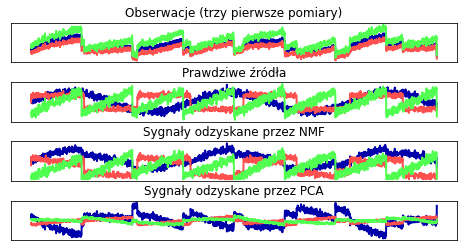

In [42]:
models = [X, S, S_, H]
names = ['Obserwacje (trzy pierwsze pomiary)',
         'Prawdziwe źródła',
         'Sygnały odzyskane przez NMF',
         'Sygnały odzyskane przez PCA']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

#### Manifold Learning z t-SNE

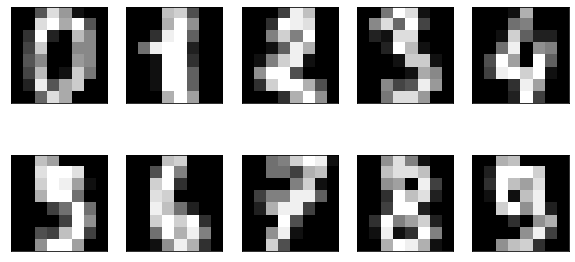

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Drugi główny komponent')

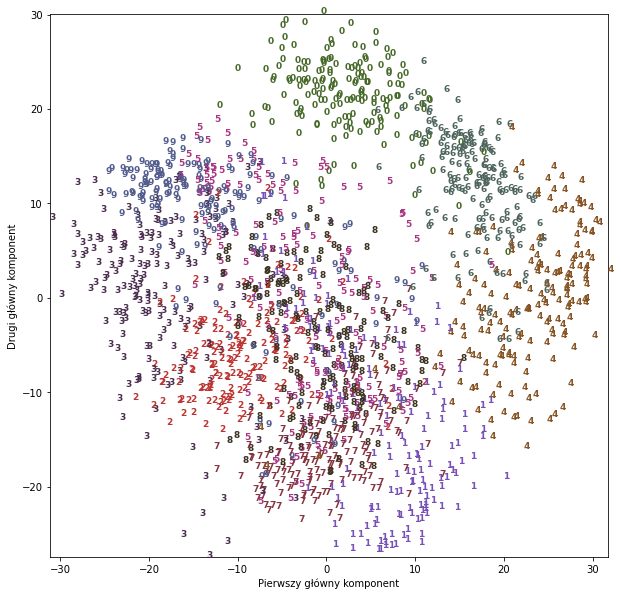

In [44]:
# zbuduj model PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# przekształć dane o cyfrach w dwa pierwsze komponenty
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # swórz wykres przy użyciu cyfr jako punktów
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Pierwszy główny komponent")
plt.ylabel("Drugi główny komponent")

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# ponieważ w klasie TSNE nie ma metody transform, zamiast metody fit użyj metody fit_transform
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE cecha 1')

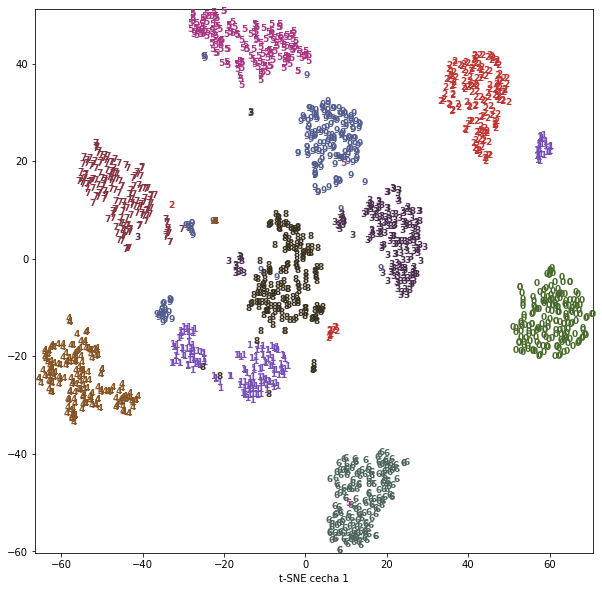

In [46]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # swórz wykres przy użyciu cyfr jako punktów
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE cecha 0")
plt.xlabel("t-SNE cecha 1")

### Grupowanie

#### Grupowanie k-średnich

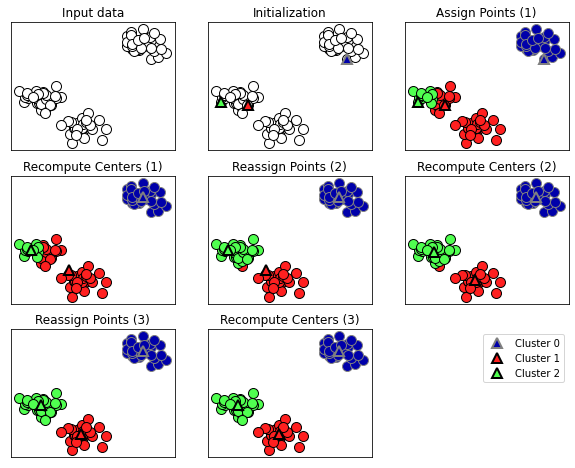

In [47]:
mglearn.plots.plot_kmeans_algorithm()

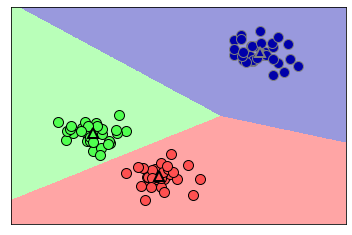

In [48]:
mglearn.plots.plot_kmeans_boundaries()

In [49]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# wygeneruj syntetyczne dane dwuwymiarowe
X, y = make_blobs(random_state=1)
# zbuduj model grupujący
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [50]:
print("Przynależności do klastra:\n{}".format(kmeans.labels_))

Przynależności do klastra:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [51]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


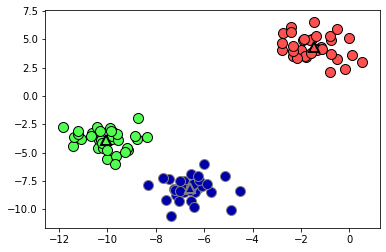

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

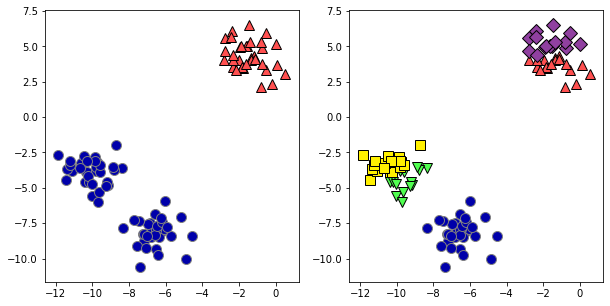

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# użyj dwóch centrów klastrów:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# użyj pięciu centrów klastrów:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

##### Przypadki awarii grupowania k-średnich

Text(0, 0.5, 'Cecha 1')

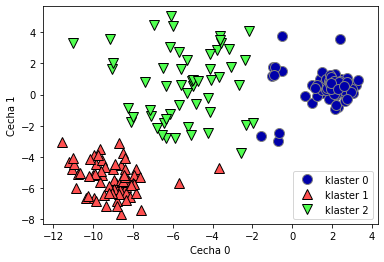

In [54]:
X_varied, y_varied = make_blobs(n_samples=200,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["klaster 0", "klaster 1", "klaster 2"], loc='best')
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

Text(0, 0.5, 'Cecha 1')

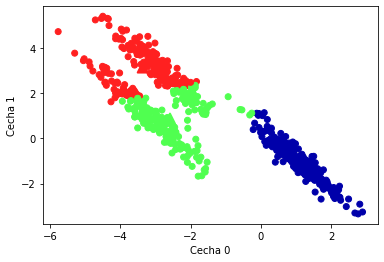

In [55]:
# wygeneruj losowe dane klastra
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# dokonaj transformacji danych, które mają być rozciągnięte
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# pogrupuj dane w trzech klastrach
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# umieść przypisania do klastra i centra klastrów na wykresie
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

Text(0, 0.5, 'NMF')

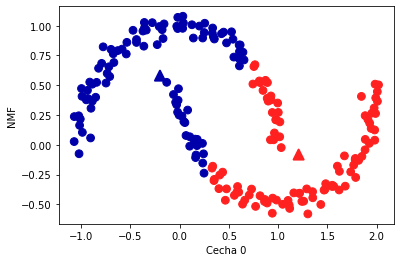

In [66]:
# wygeneruj syntetyczny zestaw danych two_moons (tym razem z mniejszą wartością parametru noise)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# pogrupuj dane w dwóch klastrach
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# umieść przypisania do klastra i centra klastrów na wykresie
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Cecha 0")
plt.ylabel("NMF")

##### Kwantyzacja wektorowa lub postrzeganie grupowania k-średnich jako dekompozycji

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0, max_iter=10000)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


ValueError: cannot reshape array of size 2 into shape (87,65)

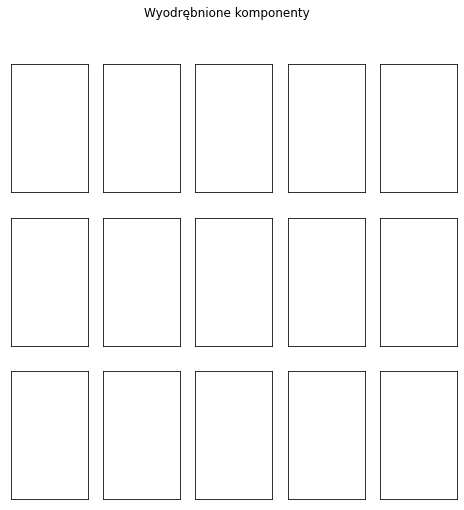

In [65]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Wyodrębnione komponenty")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("k-średnich")
axes[2, 0].set_ylabel("NMF")
axes[3, 0].set_ylabel("NMF")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Rekonstrukcje")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("oryginał")
axes[1, 0].set_ylabel("k-średnich")
axes[2, 0].set_ylabel("NMF")
axes[3, 0].set_ylabel("NMF")


Przynależność do klastrów:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


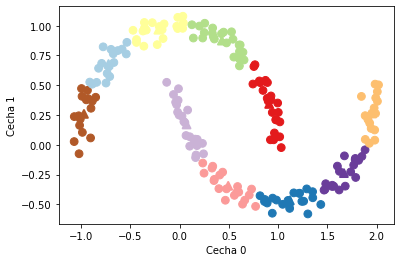

In [59]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")
print("Przynależność do klastrów:\n{}".format(y_pred))

In [60]:
distance_features = kmeans.transform(X)
print("Kształt cechy odległości: {}".format(distance_features.shape))
print("Cechy odległości:\n{}".format(distance_features))

Kształt cechy odległości: (200, 10)
Cechy odległości:
[[1.547 1.034 0.525 ... 1.141 1.125 1.808]
 [2.569 0.508 1.729 ... 0.15  2.276 2.668]
 [0.809 1.359 0.75  ... 1.765 0.719 0.951]
 ...
 [1.13  1.049 0.917 ... 1.509 1.049 1.178]
 [0.909 1.779 0.332 ... 1.983 0.343 1.328]
 [2.511 0.559 1.621 ... 0.048 2.189 2.638]]


#### Grupowanie aglomeracyjne

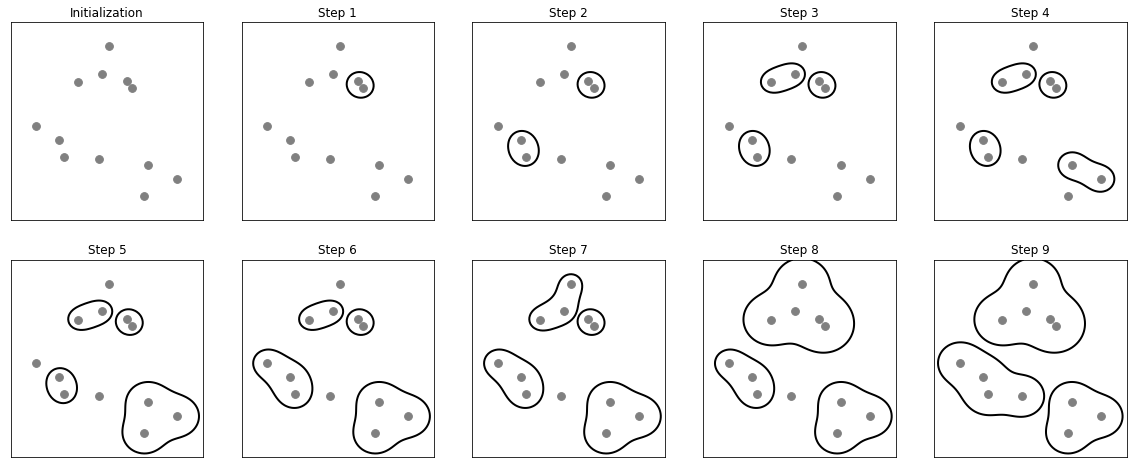

In [61]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Cecha 1')

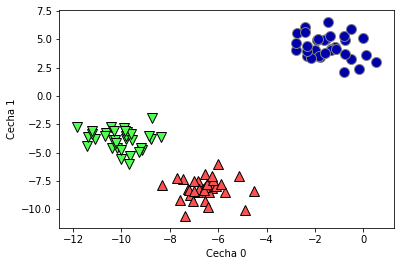

In [62]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

##### Grupowanie hierarchiczne i dendrogramy

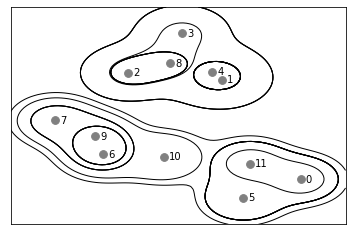

In [63]:
mglearn.plots.plot_agglomerative()

Text(120.0, 4, ' trzy klastry')

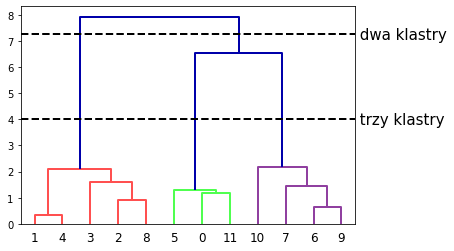

In [64]:
# Zaimportuj funkcję dendrogram i funkcję grupowania ward z SciPy
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# Zastosuj grupowanie ward do tablicy danych X
# Funkcja SciPy ward zwraca tablicę, która określa odległości
# połączone podczas tworzenia klastrów aglomeracyjnych
linkage_array = ward(X)
# Stwórz wykres, który przedstawia dendrogram dla tablicy linkage_array
# zawierającej odległości między klastrami
dendrogram(linkage_array)
# Oznacz nacięcia na drzewie, które oznaczają dwie lub trzy klastry
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' dwa klastry', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' trzy klastry', va='center', fontdict={'size': 15})

#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Przynależności do klastrów:\n{}".format(clusters))

In [ ]:
mglearn.plots.plot_dbscan()

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# przeskaluj dane do średniej zerowej i wariancji jednostkowej
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# umieść przypisania do klastrów na wykresie
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

##### Porównanie i ocena algorytmów grupowania
##### Ocenianie grupowania z prawdą podstawową

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# przeskaluj dane do średniej zerowej i wariancji jednostkowej
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# sporządź listę algorytmów do wykorzystania
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# utwórz losowe przypisanie klastra w celach porównawczych
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# umieść przypisanie losowe na wykresie
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Przypisanie losowe - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    # umieść przypisania do klastrów i centra klastrów na wykresie
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [ ]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

##### Ocenianie grupowania bez prawdy podstawowej

In [ ]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# przeskaluj dane do średniej zerowej i wariancji jednostkowej
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# utwórz losowe przypisanie klastra w celach porównawczych
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# umieść przypisanie losowe na wykresie
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Przypisanie losowe: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # umieść przypisania do klastrów i centra klastrów na wykresie
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

##### Porównanie algorytmów na zestawie danych twarzy

In [ ]:
# wyodrębnij powierzchnie własne z danych lfw i dokonaj ich transformacji
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

##### Analiza zbioru danych twarzy za pomocą algorytmu DBSCAN

In [ ]:
# zastosuj DBSCAN z domyślnymi parametrami
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unikalne etykiety: {}".format(np.unique(labels)))

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unikalne etykiety: {}".format(np.unique(labels)))

In [ ]:
# Policz liczbę punktów we wszystkich klastrach i punktów szumu.
# Funkcja bincount nie przyjmuje liczb ujemnych, więc musimy dodać 1.
# Pierwsza liczba w wyniku odpowiada punktom szumu.
print("Liczba punktów na klaster: {}".format(np.bincount(labels + 1)))

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Obecne klastry: {}".format(np.unique(labels)))
    print("Rozmiary klastrów: {}".format(np.bincount(labels + 1)))

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

##### Analyzing the faces dataset with k-Means

In [ ]:
# wyodrębnij klastry przy użyciu grupowania k-średnich
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Rozmiary klastrów dla grupowania k-średnich: {}".format(np.bincount(labels_km)))

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

##### Analiza zbioru danych twarzy za pomocą grupowania aglomeracyjnego

In [ ]:
# wyodrębnij klastry używając grupowania aglomeracyjnego
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Rozmiary klastrów dla grupowania aglomeracyjnego: {}".format(
np.bincount(labels_agg)))

In [ ]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

In [ ]:
linkage_array = ward(X_pca)
# wykreśl dendrogram dla tablicy linkage_array, która
# zawiera odległości między klastrami
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Indeks próbki")
plt.ylabel("Odległość od klastra")

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

In [ ]:
# wyodrębnij klastry przy użyciu grupowania aglomeracyjnego
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("Rozmiary klastrów dla grupowania aglomeracyjnego: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # "interesujące" klastry wybrane ręcznie
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

#### Podsumowanie metod grupowania

### Podsumowanie i przegląd

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

![api_table](images/api_table.png)